## Predictive Modeling for Disease Diagnosis

# Predictive Modeling for Disease Diagnosis

## Overview:

In this notebook, we aim to develop a predictive model for disease diagnosis using machine learning techniques. The ability to accurately predict diseases can significantly impact healthcare outcomes by enabling early detection and intervention, thereby improving patient prognosis and reducing healthcare costs.

### Objective:
Our primary objective is to build a predictive model capable of accurately identifying the presence or absence of a particular disease based on a set of input features. 

### Dataset:
We will be using a dataset containing relevant features such as demographic information, medical history, laboratory test results, and other pertinent variables. This dataset will serve as the basis for training and evaluating our predictive model.

### Methodology:
1. **Data Preprocessing:** We will begin by exploring and preprocessing the dataset. This includes handling missing values, encoding categorical variables, and scaling numerical features as necessary.
2. **Feature Selection/Engineering:** Next, we will perform feature selection or engineering to identify the most relevant features for our predictive model. This step aims to enhance model performance and reduce dimensionality.
3. **Model Selection:** We will experiment with various machine learning algorithms such as logistic regression, decision trees, random forests, support vector machines, and neural networks to determine the most suitable model for our task.
4. **Model Training:** After selecting the appropriate model, we will train it using the preprocessed dataset.
5. **Model Evaluation:** We will evaluate the performance of the trained model using relevant evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC curve. This step helps assess the model's predictive power and generalization capability.
6. **Model Tuning:** If necessary, we will fine-tune hyperparameters and perform cross-validation to optimize the model's performance further.
7. **Model Interpretation:** Finally, we will interpret the results and gain insights into the factors contributing to disease diagnosis predictions.

### Conclusion:
By the end of this notebook, we aim to have developed a robust predictive model that can effectively assist healthcare professionals in diagnosing diseases accurately and efficiently.

---

## 1. Data Preprocessing:

### 1.1 Importing necessary libraries

In [28]:
# Lets import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [29]:
data=pd.read_excel('Train_data.xlsx')

In [30]:
data.head(10)

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   
5  0.898222     0.258706    0.933307   0.353082           0.373952   
6  0.353734     0.757757    0.755007   0.012594           0.227684   
7  0.399017     0.508254    0.777394   0.096310           0.925520   
8  0.722428     0.300282    0.487907   0.200865           0.402035   
9  0.399017     0.508254    0.777394   0.096310           0.925520   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   
5         0.297138    0.900010                 0.985488   
6         0.425117    0.387461                 0.461418   
7         0.652505    0.684896                 0.380656   
8         0.729285    0.851338                 0.820546   
9         0.652505    0.684896                 0.380656   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   
5                     0.679007                                   0.355774   
6                     0.305588                                   0.741120   
7                     0.248189                                   0.490245   
8                     0.106637                                   0.006947   
9                     0.248189                                   0.490245   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1  ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2  ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3  ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4  ...  0.429431         0.146294         0.221574  0.015280  0.567115   
5  ...  0.389461         0.529914         0.222687  0.772461  0.119994   
6  ...  0.446854         0.729376         0.615543  0.794735  0.233890   
7  ...  0.673188         0.033037         0.772045  0.253892  0.322486   
8  ...  0.022621         0.061317         0.644191  0.715823  0.417170   
9  ...  0.673188         0.033037         0.772045  0.253892  0.322486   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.939485    0.095512  0.465957            0.769230   Healthy  
1    0.666368    0.659060  0.816982            0.401166  Diabetes  
2    0.431704    0.417295  0.799074            0.779208  Thalasse  
3    0.225756    0.490349  0.637061            0.354094    Anemia  
4    0.841412    0.153350  0.794008            0.094970  Thalasse  
5    0.894273    0.128124  0.379016            0.751438  Diabetes  
6    0.612188    0.407891  0.426863            0.532100  Thromboc  
7    0.659069    0.774219  0.714177            0.609177  Thromboc  
8    0.639148    0.213026  0.549920            0.036800  Thalasse  
9    0.659069    0.774219  0.714177            0.609177  Thromboc  

[10 rows x 25 columns]

In [31]:
data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

The dataset have no null values, now lets see the statistics of dataset by using describe() method.

In [32]:
data.describe()

Glucose  Cholesterol   Hemoglobin    Platelets  White Blood Cells  \
count  2351.000000  2351.000000  2351.000000  2351.000000        2351.000000   
mean      0.362828     0.393648     0.586190     0.504027           0.511086   
std       0.251889     0.239449     0.271498     0.303347           0.277270   
min       0.010994     0.012139     0.003021     0.012594           0.010139   
25%       0.129198     0.195818     0.346092     0.200865           0.259467   
50%       0.351722     0.397083     0.609836     0.533962           0.527381   
75%       0.582278     0.582178     0.791215     0.754841           0.743164   
max       0.968460     0.905026     0.983306     0.999393           0.990786   

       Red Blood Cells   Hematocrit  Mean Corpuscular Volume  \
count      2351.000000  2351.000000              2351.000000   
mean          0.506590     0.507152                 0.492200   
std           0.266565     0.285537                 0.275735   
min           0.044565     0.011772                 0.046942   
25%           0.263589     0.288132                 0.287532   
50%           0.467431     0.493428                 0.453052   
75%           0.743670     0.753657                 0.722293   
max           1.000000     0.977520                 0.995263   

       Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
count                  2351.000000                                2351.000000   
mean                      0.484459                                   0.562273   
std                       0.315618                                   0.273281   
min                       0.000554                                   0.006947   
25%                       0.207938                                   0.355774   
50%                       0.420723                                   0.603635   
75%                       0.778160                                   0.741381   
max                       0.963235                                   0.975586   

       ...  Triglycerides        HbA1c  LDL Cholesterol  HDL Cholesterol  \
count  ...    2351.000000  2351.000000      2351.000000      2351.000000   
mean   ...       0.374373     0.439112         0.421777         0.546079   
std    ...       0.256981     0.263779         0.252124         0.269511   
min    ...       0.005217     0.016256         0.033037         0.039505   
25%    ...       0.184604     0.188750         0.217757         0.307132   
50%    ...       0.317857     0.466375         0.413071         0.512941   
75%    ...       0.572330     0.652514         0.604753         0.779378   
max    ...       0.973679     0.950218         0.983826         0.989411   

               ALT          AST   Heart Rate   Creatinine     Troponin  \
count  2351.000000  2351.000000  2351.000000  2351.000000  2351.000000   
mean      0.434972     0.452138     0.582255     0.425075     0.454597   
std       0.267388     0.242075     0.250915     0.229298     0.251189   
min       0.007186     0.013013     0.114550     0.021239     0.007490   
25%       0.211078     0.239659     0.339125     0.213026     0.288961   
50%       0.373235     0.486317     0.610860     0.417295     0.426863   
75%       0.710319     0.616181     0.800666     0.606719     0.682164   
max       0.942549     0.994460     0.996873     0.925924     0.972803   

       C-reactive Protein  
count         2351.000000  
mean             0.430308  
std              0.243034  
min              0.004867  
25%              0.196192  
50%              0.481601  
75%              0.631426  
max              0.797906  

[8 rows x 24 columns]

The dataset statistics showing that, the dataset is clean, lets see the distribution visualization

In [33]:
data.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [34]:
len(data.columns)

25

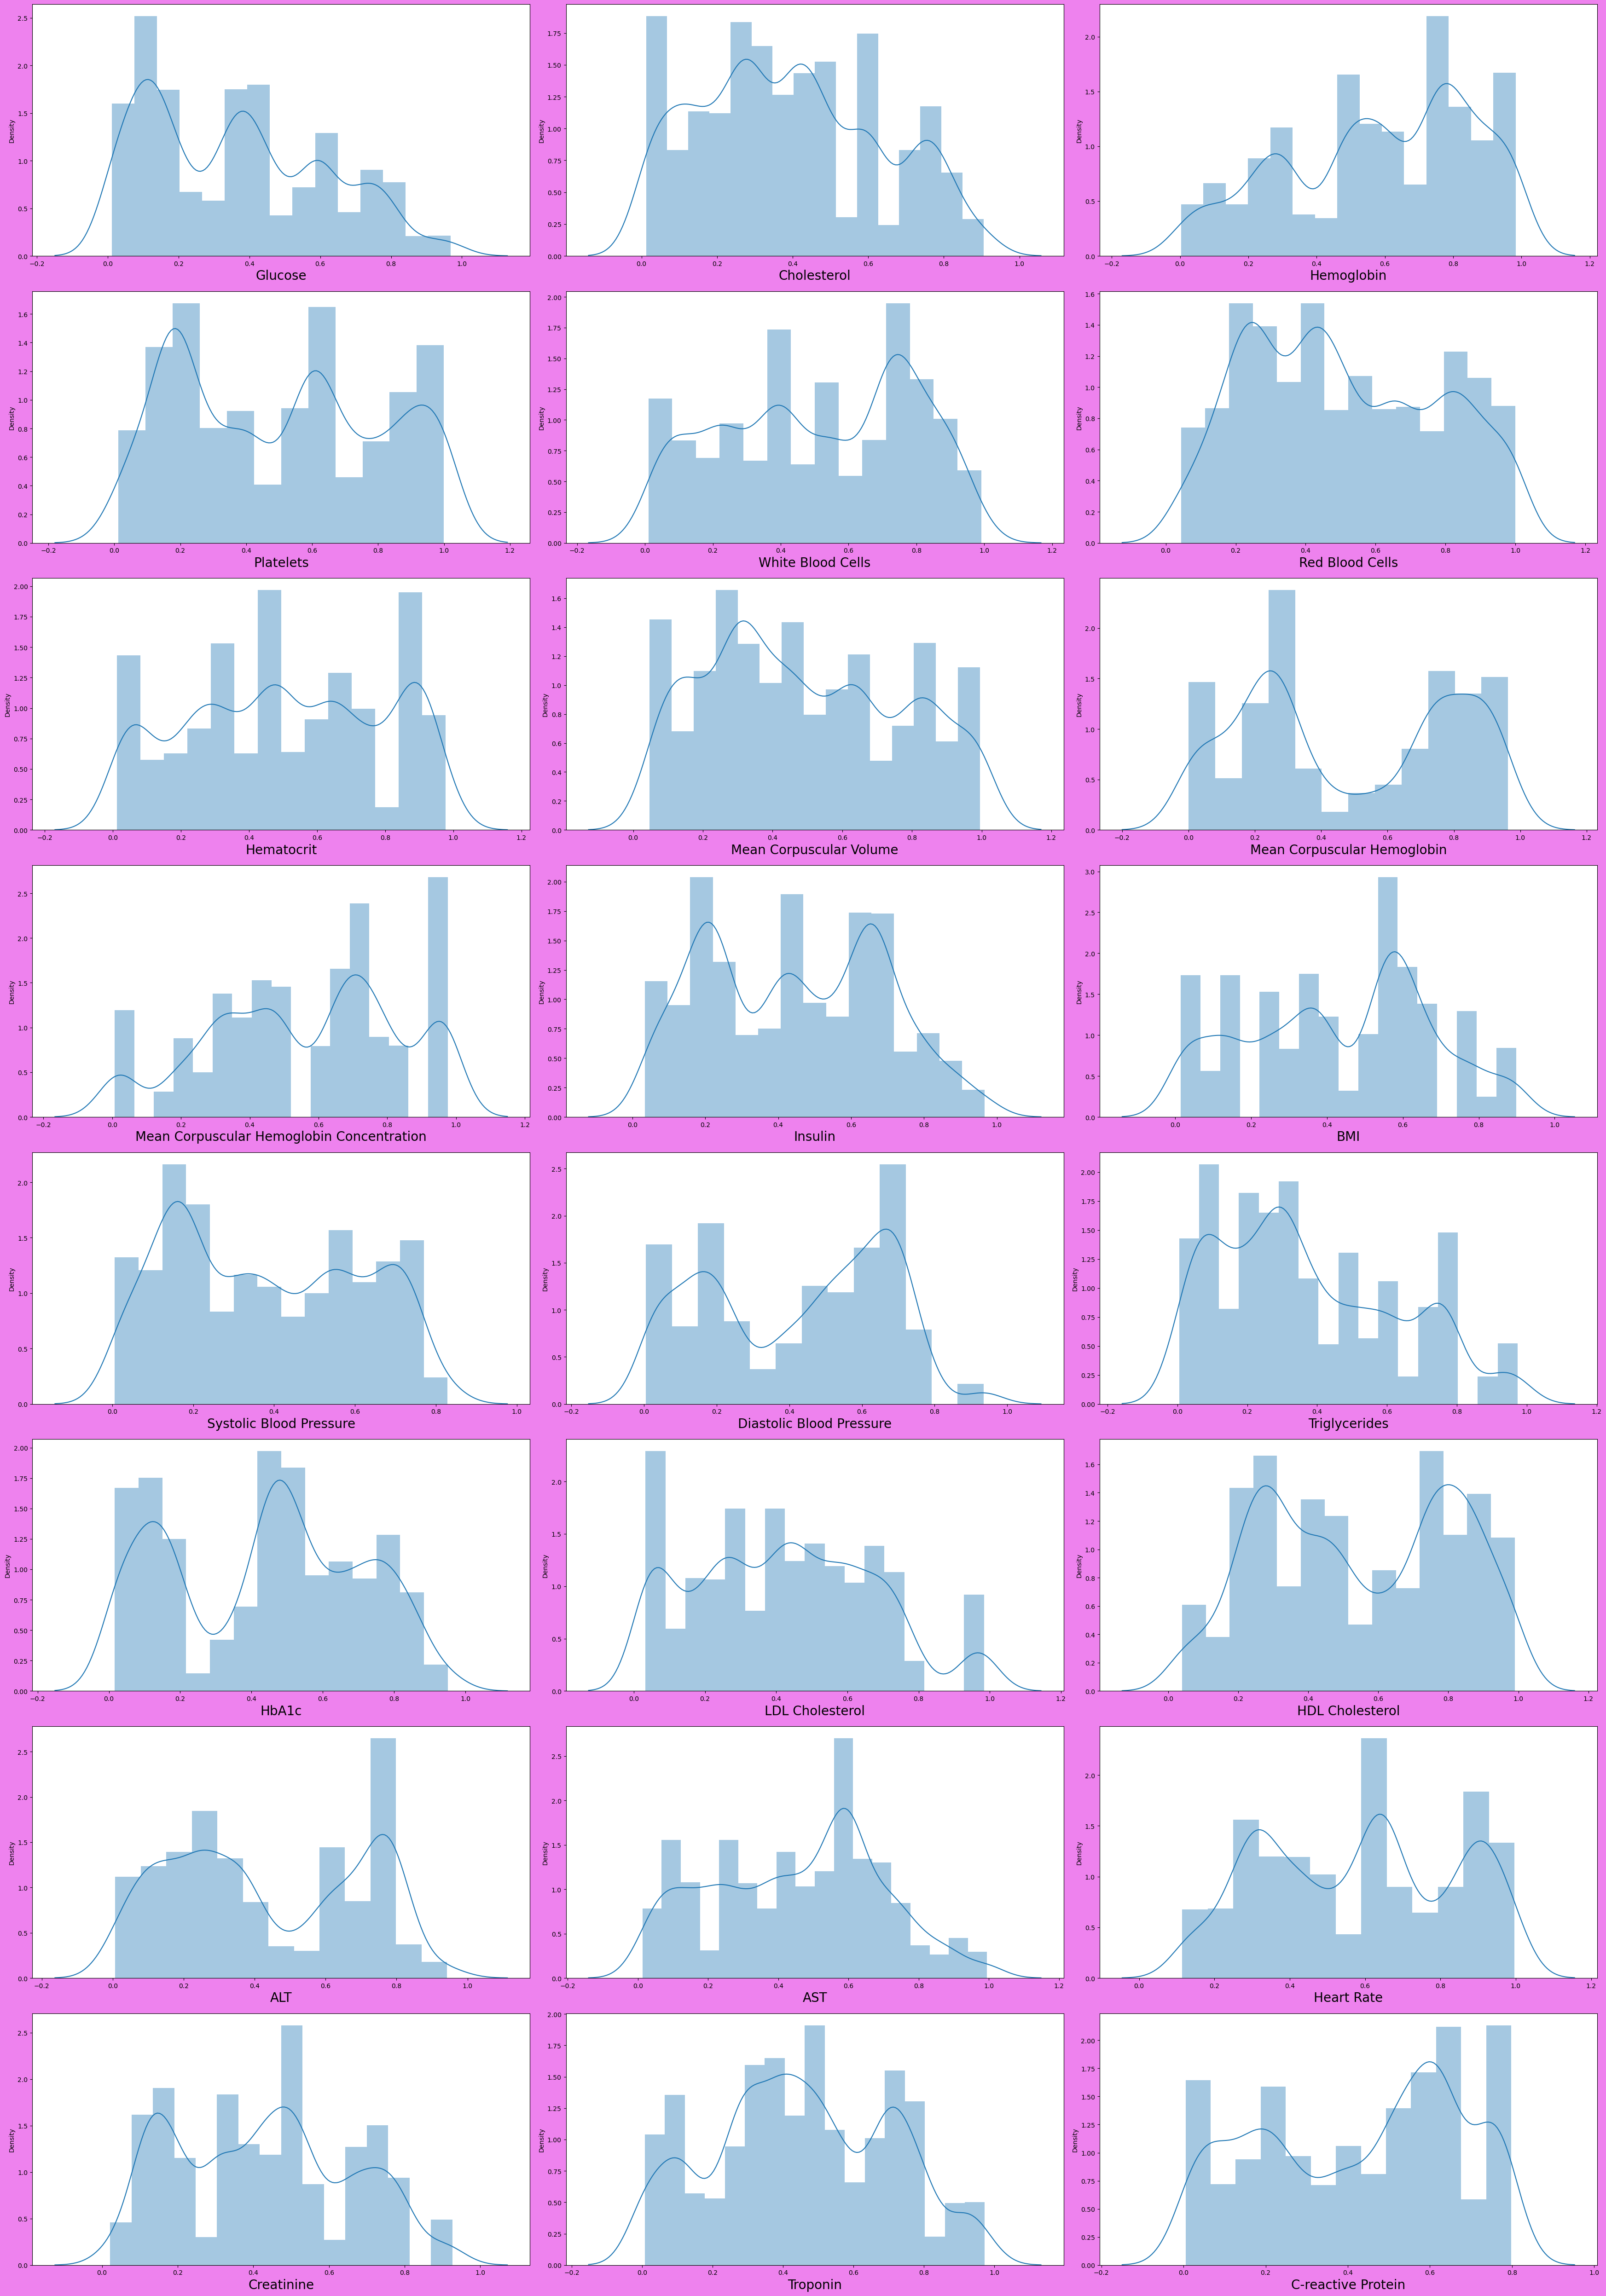

In [35]:
# let's see how data is distributed for every column

plt.figure(figsize=(35,50),facecolor='violet')
plotnumber=1

for column in data:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()
plt.show()

In [36]:
from scipy.stats import skew

In [37]:
features=data.drop('Disease',axis=1)

In [38]:
for column in features:
    print(column,"------:              ",data[column].skew())

Glucose ------:               0.4145458866222165
Cholesterol ------:               0.2554005765978957
Hemoglobin ------:               -0.39477650064425834
Platelets ------:               0.12481055729419574
White Blood Cells ------:               -0.1518395468254505
Red Blood Cells ------:               0.21862074929513725
Hematocrit ------:               -0.0731243779006628
Mean Corpuscular Volume ------:               0.22791360055515325
Mean Corpuscular Hemoglobin ------:               0.045223927580875616
Mean Corpuscular Hemoglobin Concentration ------:               -0.24886285780029402
Insulin ------:               0.09712126278660345
BMI ------:               -0.08456966690872071
Systolic Blood Pressure ------:               0.15601553387338146
Diastolic Blood Pressure ------:               -0.15232972937530492
Triglycerides ------:               0.5085099198902315
HbA1c ------:               -0.04277234329026311
LDL Cholesterol ------:               0.2368691482512446
HDL Cho

The skewness values for each column in the dataset indicate that there is no significant skewness present.

Since The data shows minimal skewness across all columns. It is suitable for further analysis without the need for additional transformations to address skewness.


In [39]:
data['Disease'].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

In [40]:
data.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1  ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2  ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3  ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4  ...  0.429431         0.146294         0.221574  0.015280  0.567115   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.939485    0.095512  0.465957            0.769230   Healthy  
1    0.666368    0.659060  0.816982            0.401166  Diabetes  
2    0.431704    0.417295  0.799074            0.779208  Thalasse  
3    0.225756    0.490349  0.637061            0.354094    Anemia  
4    0.841412    0.153350  0.794008            0.094970  Thalasse  

[5 rows x 25 columns]

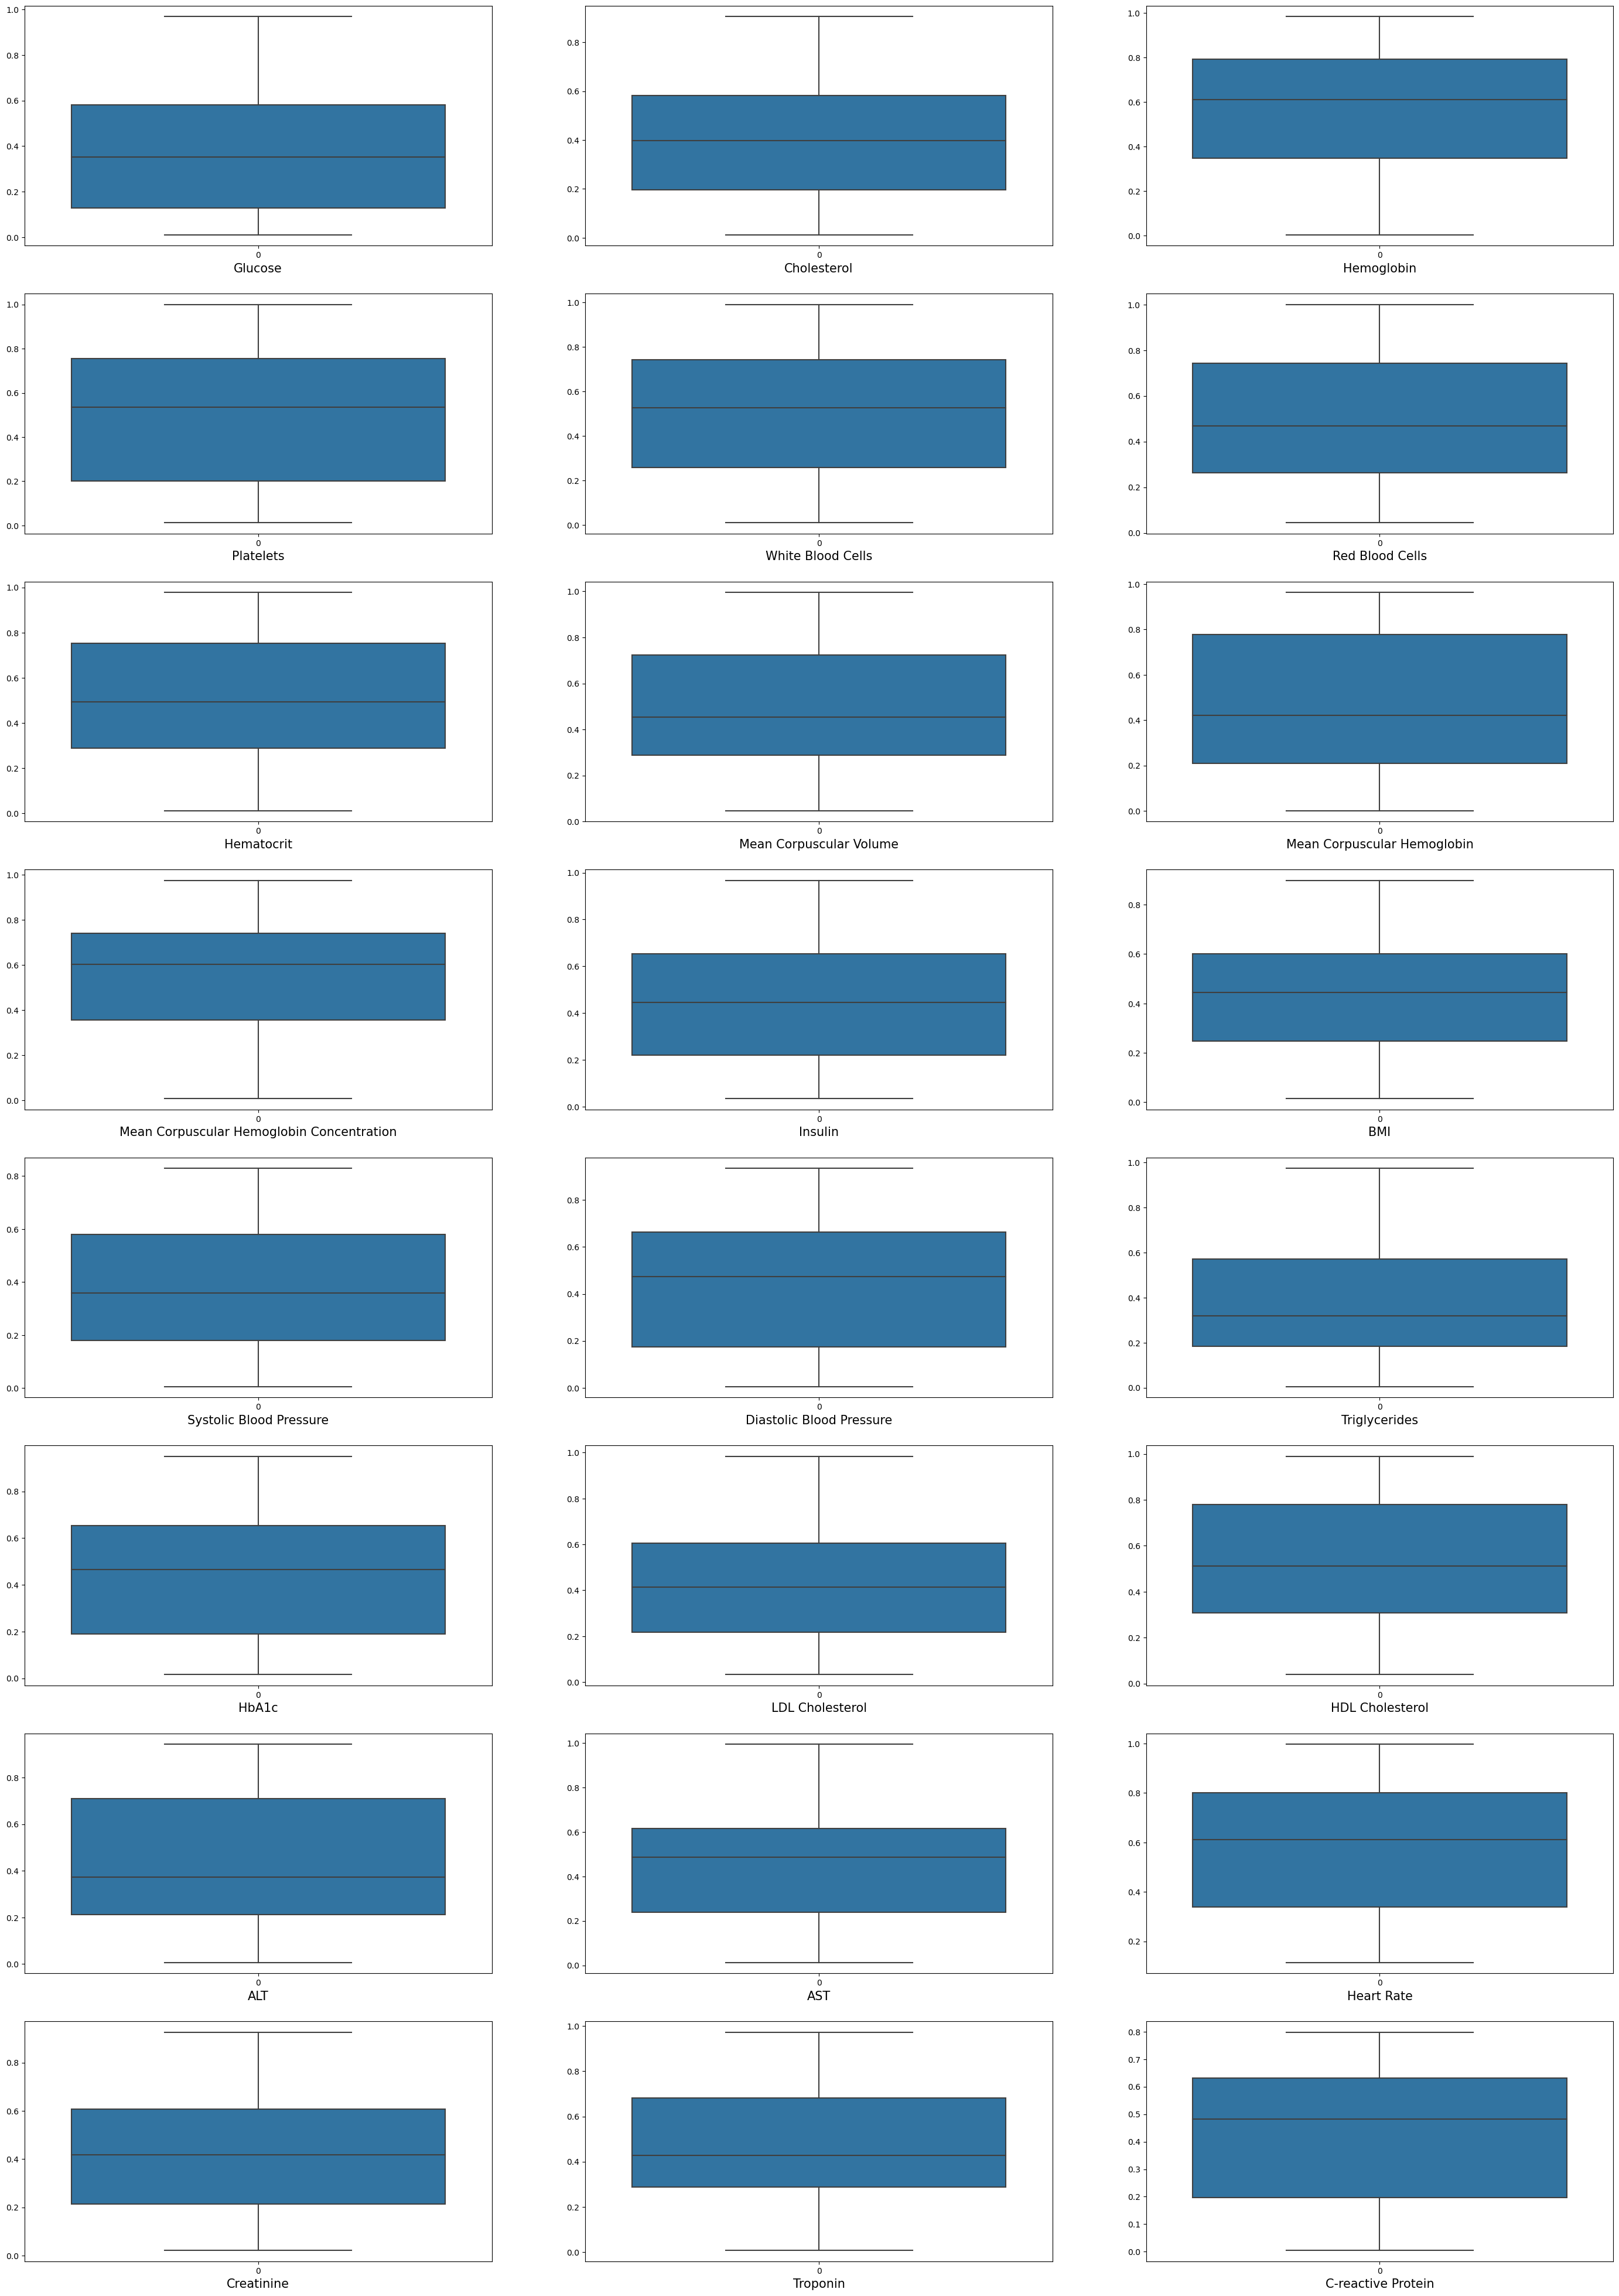

In [41]:
# Visualize the outliers using boxplot
plt.figure(figsize=(35,50))
graph = 1

for column in features:
    if graph<=24:    
        plt.subplot(8,3,graph)
        ax=sns.boxplot(data= features[column])
        plt.xlabel(column,fontsize=15)      
    graph+=1

plt.savefig('boxplot_for_disease_data') 
plt.show()


The boxplots suggest that the dataset has a relatively balanced distribution for most features, with no extreme outliers. This indicates that the data is generally clean and suitable for further analysis, including building predictive models. The moderate spread in most features suggests a good range of variability, which is beneficial for model training. We can proceed with encoding the labels and building predictive models.

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
disease=pd.get_dummies(data[['Disease']], dtype=int)
disease.head()

Disease_Anemia  Disease_Diabetes  Disease_Healthy  Disease_Thalasse  \
0               0                 0                1                 0   
1               0                 1                0                 0   
2               0                 0                0                 1   
3               1                 0                0                 0   
4               0                 0                0                 1   

   Disease_Thromboc  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [44]:
data=pd.concat([data,disease],axis=1)
data

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0     0.739597     0.650198    0.713631   0.868491           0.687433   
1     0.121786     0.023058    0.944893   0.905372           0.507711   
2     0.452539     0.116135    0.544560   0.400640           0.294538   
3     0.136609     0.015605    0.419957   0.191487           0.081168   
4     0.176737     0.752220    0.971779   0.785286           0.443880   
...        ...          ...         ...        ...                ...   
2346  0.012956     0.336925    0.451218   0.175006           0.734664   
2347  0.407101     0.124738    0.983306   0.663867           0.361113   
2348  0.344356     0.783918    0.582171   0.996841           0.065363   
2349  0.351722     0.014278    0.898615   0.167550           0.727148   
2350  0.032726     0.053596    0.102633   0.221356           0.153956   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0            0.529895    0.290006                 0.631045   
1            0.403033    0.164216                 0.307553   
2            0.382021    0.625267                 0.295122   
3            0.166214    0.073293                 0.668719   
4            0.439851    0.894991                 0.442159   
...               ...         ...                      ...   
2346         0.382770    0.656463                 0.177502   
2347         0.663716    0.232516                 0.341056   
2348         0.242885    0.658851                 0.543017   
2349         0.046091    0.900434                 0.136227   
2350         0.216573    0.312577                 0.608940   

      Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                        0.001328                                   0.795829   
1                        0.207938                                   0.505562   
2                        0.868369                                   0.026808   
3                        0.125447                                   0.501051   
4                        0.257288                                   0.805987   
...                           ...                                        ...   
2346                     0.808162                                   0.684499   
2347                     0.847441                                   0.309766   
2348                     0.290106                                   0.838722   
2349                     0.134361                                   0.279219   
2350                     0.486174                                   0.450700   

      ...  Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  \
0     ...    0.939485    0.095512  0.465957            0.769230   Healthy   
1     ...    0.666368    0.659060  0.816982            0.401166  Diabetes   
2     ...    0.431704    0.417295  0.799074            0.779208  Thalasse   
3     ...    0.225756    0.490349  0.637061            0.354094    Anemia   
4     ...    0.841412    0.153350  0.794008            0.094970  Thalasse   
...   ...         ...         ...       ...                 ...       ...   
2346  ...    0.636125    0.132226  0.716519            0.006121  Diabetes   
2347  ...    0.339125    0.310964  0.310900            0.622403  Thalasse   
2348  ...    0.344728    0.606719  0.395145            0.134021    Anemia   
2349  ...    0.996873    0.882164  0.411158            0.146255  Diabetes   
2350  ...    0.982893    0.437285  0.288961            0.709262    Anemia   

      Disease_Anemia  Disease_Diabetes  Disease_Healthy  Disease_Thalasse  \
0                  0                 0                1                 0   
1                  0                 1                0                 0   
2                  0                 0                0                 1   
3                  1                 0                0                 0   
4                  0                 0                0                 1   
...              ...               ..

In [45]:
data=data.drop(columns=['Disease'])

In [46]:
data.rename(columns={'Disease_Healthy':'Healthy'},inplace=True)
data.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   

   ...       AST  Heart Rate  Creatinine  Troponin  C-reactive Protein  \
0  ...  0.610827    0.939485    0.095512  0.465957            0.769230   
1  ...  0.344261    0.666368    0.659060  0.816982            0.401166   
2  ...  0.506918    0.431704    0.417295  0.799074            0.779208   
3  ...  0.594148    0.225756    0.490349  0.637061            0.354094   
4  ...  0.567115    0.841412    0.153350  0.794008            0.094970   

   Disease_Anemia  Disease_Diabetes  Healthy  Disease_Thalasse  \
0               0                 0        1                 0   
1               0                 1        0                 0   
2               0                 0        0                 1   
3               1                 0        0                 0   
4               0                 0        0                 1   

   Disease_Thromboc  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 29 columns]

In [47]:
data.Healthy.value_counts()

Healthy
0    1795
1     556
Name: count, dtype: int64

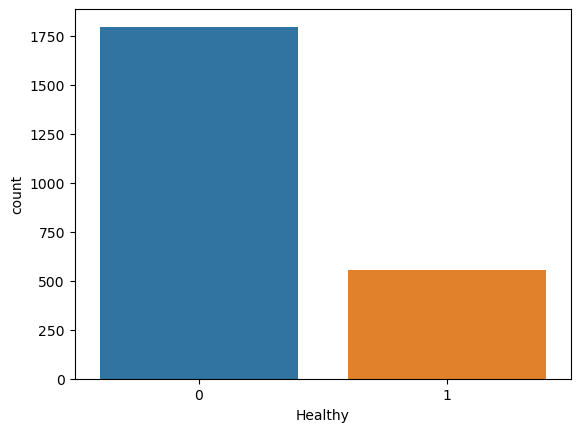

In [48]:
#Plot each class freequency
sns.countplot(x='Healthy',data=data)
plt.show()

over sampling

In [49]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data[data['Healthy'] == 0]
data_minority = data[data['Healthy'] == 1]

In [50]:
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=1795,    # to match majority class
                                 random_state=42)   # reproducible results

In [51]:
# Combine majority class with upsampled minority class
data_balanced = pd.concat([data_majority, data_minority_upsampled])

In [52]:
# Display new class counts
print(data_balanced['Healthy'].value_counts())

Healthy
0    1795
1    1795
Name: count, dtype: int64


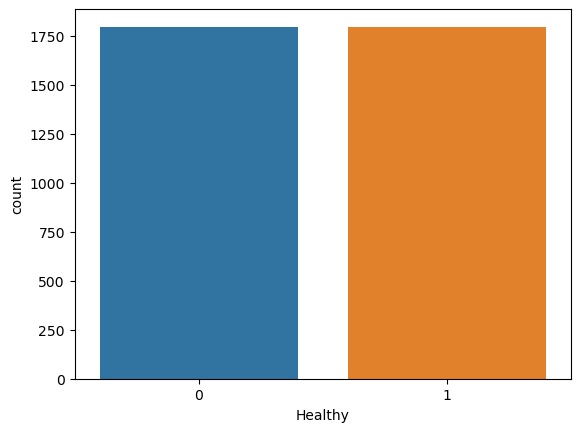

In [53]:
#Plot each class freequency
sns.countplot(x='Healthy',data=data_balanced)
plt.show()

In [54]:
data_balanced.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   
5  0.898222     0.258706    0.933307   0.353082           0.373952   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   
5         0.297138    0.900010                 0.985488   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   
5                     0.679007                                   0.355774   

   ...       AST  Heart Rate  Creatinine  Troponin  C-reactive Protein  \
1  ...  0.344261    0.666368    0.659060  0.816982            0.401166   
2  ...  0.506918    0.431704    0.417295  0.799074            0.779208   
3  ...  0.594148    0.225756    0.490349  0.637061            0.354094   
4  ...  0.567115    0.841412    0.153350  0.794008            0.094970   
5  ...  0.119994    0.894273    0.128124  0.379016            0.751438   

   Disease_Anemia  Disease_Diabetes  Healthy  Disease_Thalasse  \
1               0                 1        0                 0   
2               0                 0        0                 1   
3               1                 0        0                 0   
4               0                 0        0                 1   
5               0                 1        0                 0   

   Disease_Thromboc  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  

[5 rows x 29 columns]

In [55]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3590 entries, 1 to 1980
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    3590 non-null   float64
 1   Cholesterol                                3590 non-null   float64
 2   Hemoglobin                                 3590 non-null   float64
 3   Platelets                                  3590 non-null   float64
 4   White Blood Cells                          3590 non-null   float64
 5   Red Blood Cells                            3590 non-null   float64
 6   Hematocrit                                 3590 non-null   float64
 7   Mean Corpuscular Volume                    3590 non-null   float64
 8   Mean Corpuscular Hemoglobin                3590 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  3590 non-null   float64
 10  Insulin                      

Heat Map


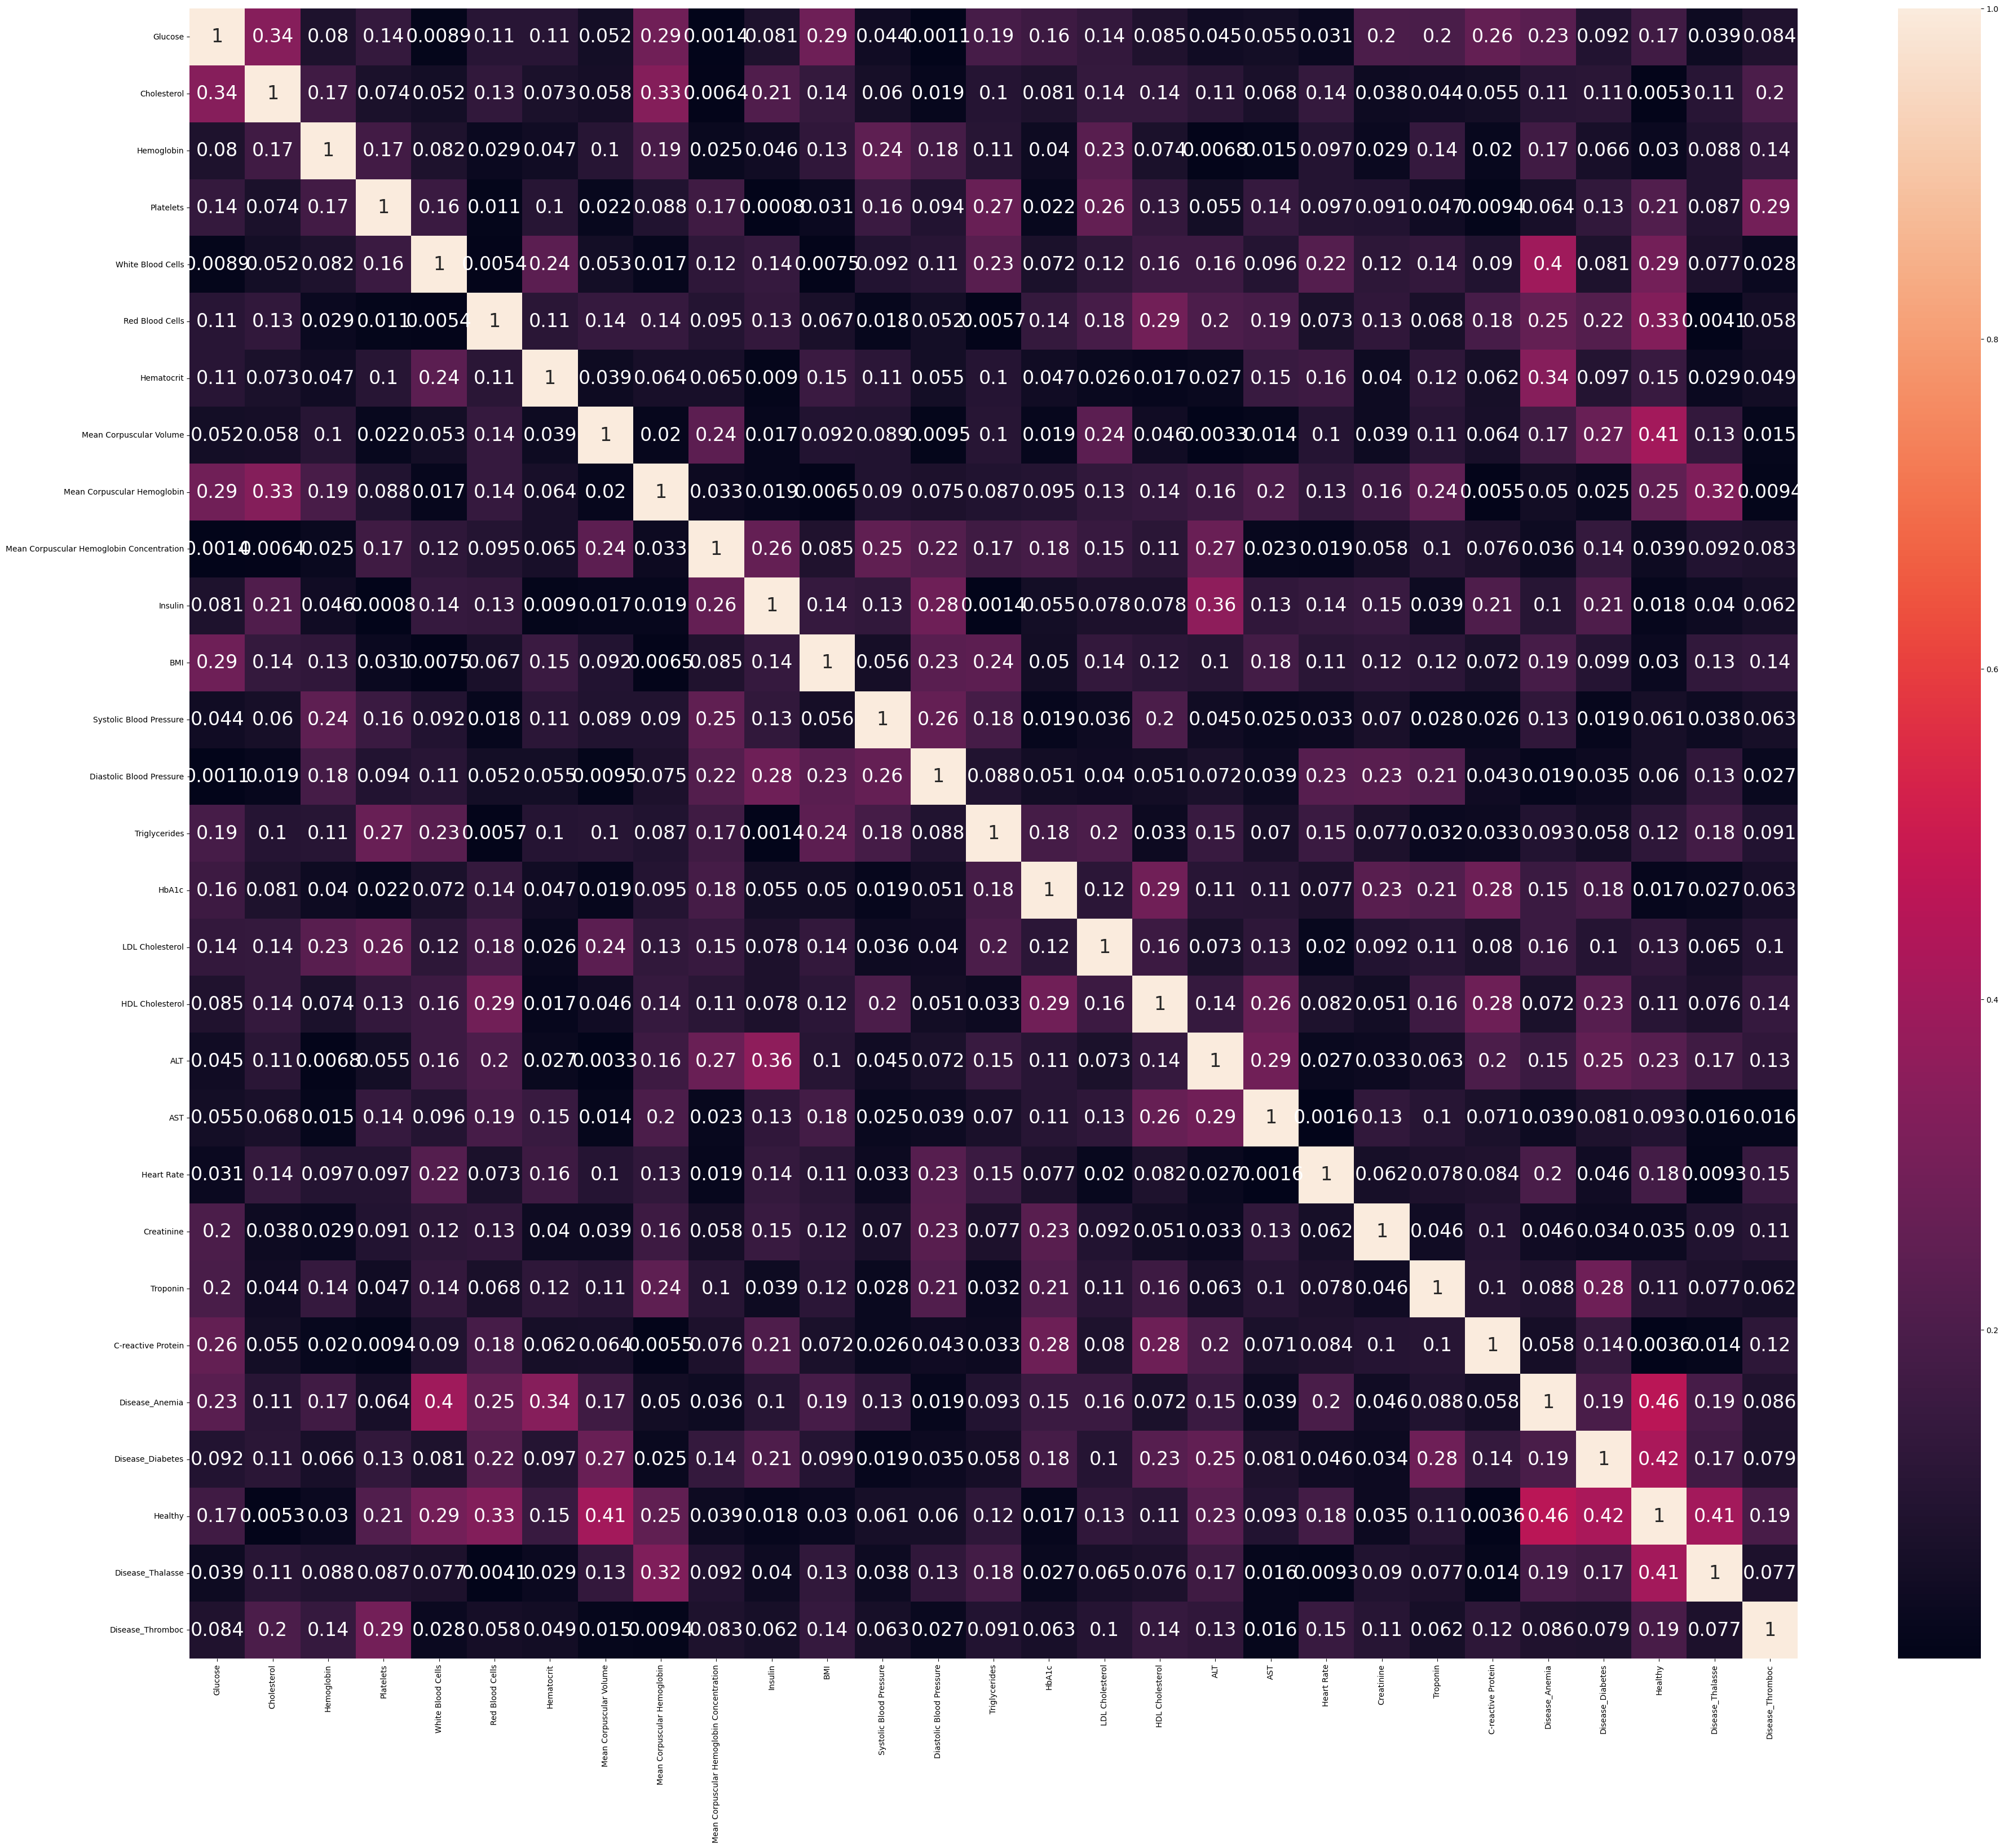

In [57]:
data_corr = data_balanced.corr().abs()  # This code will get the coefficient of one variable vs all other variable (Relationship)

plt.figure(figsize=(46, 38))
sns.heatmap(data_corr,annot=True,  annot_kws={'size':24})
plt.show()

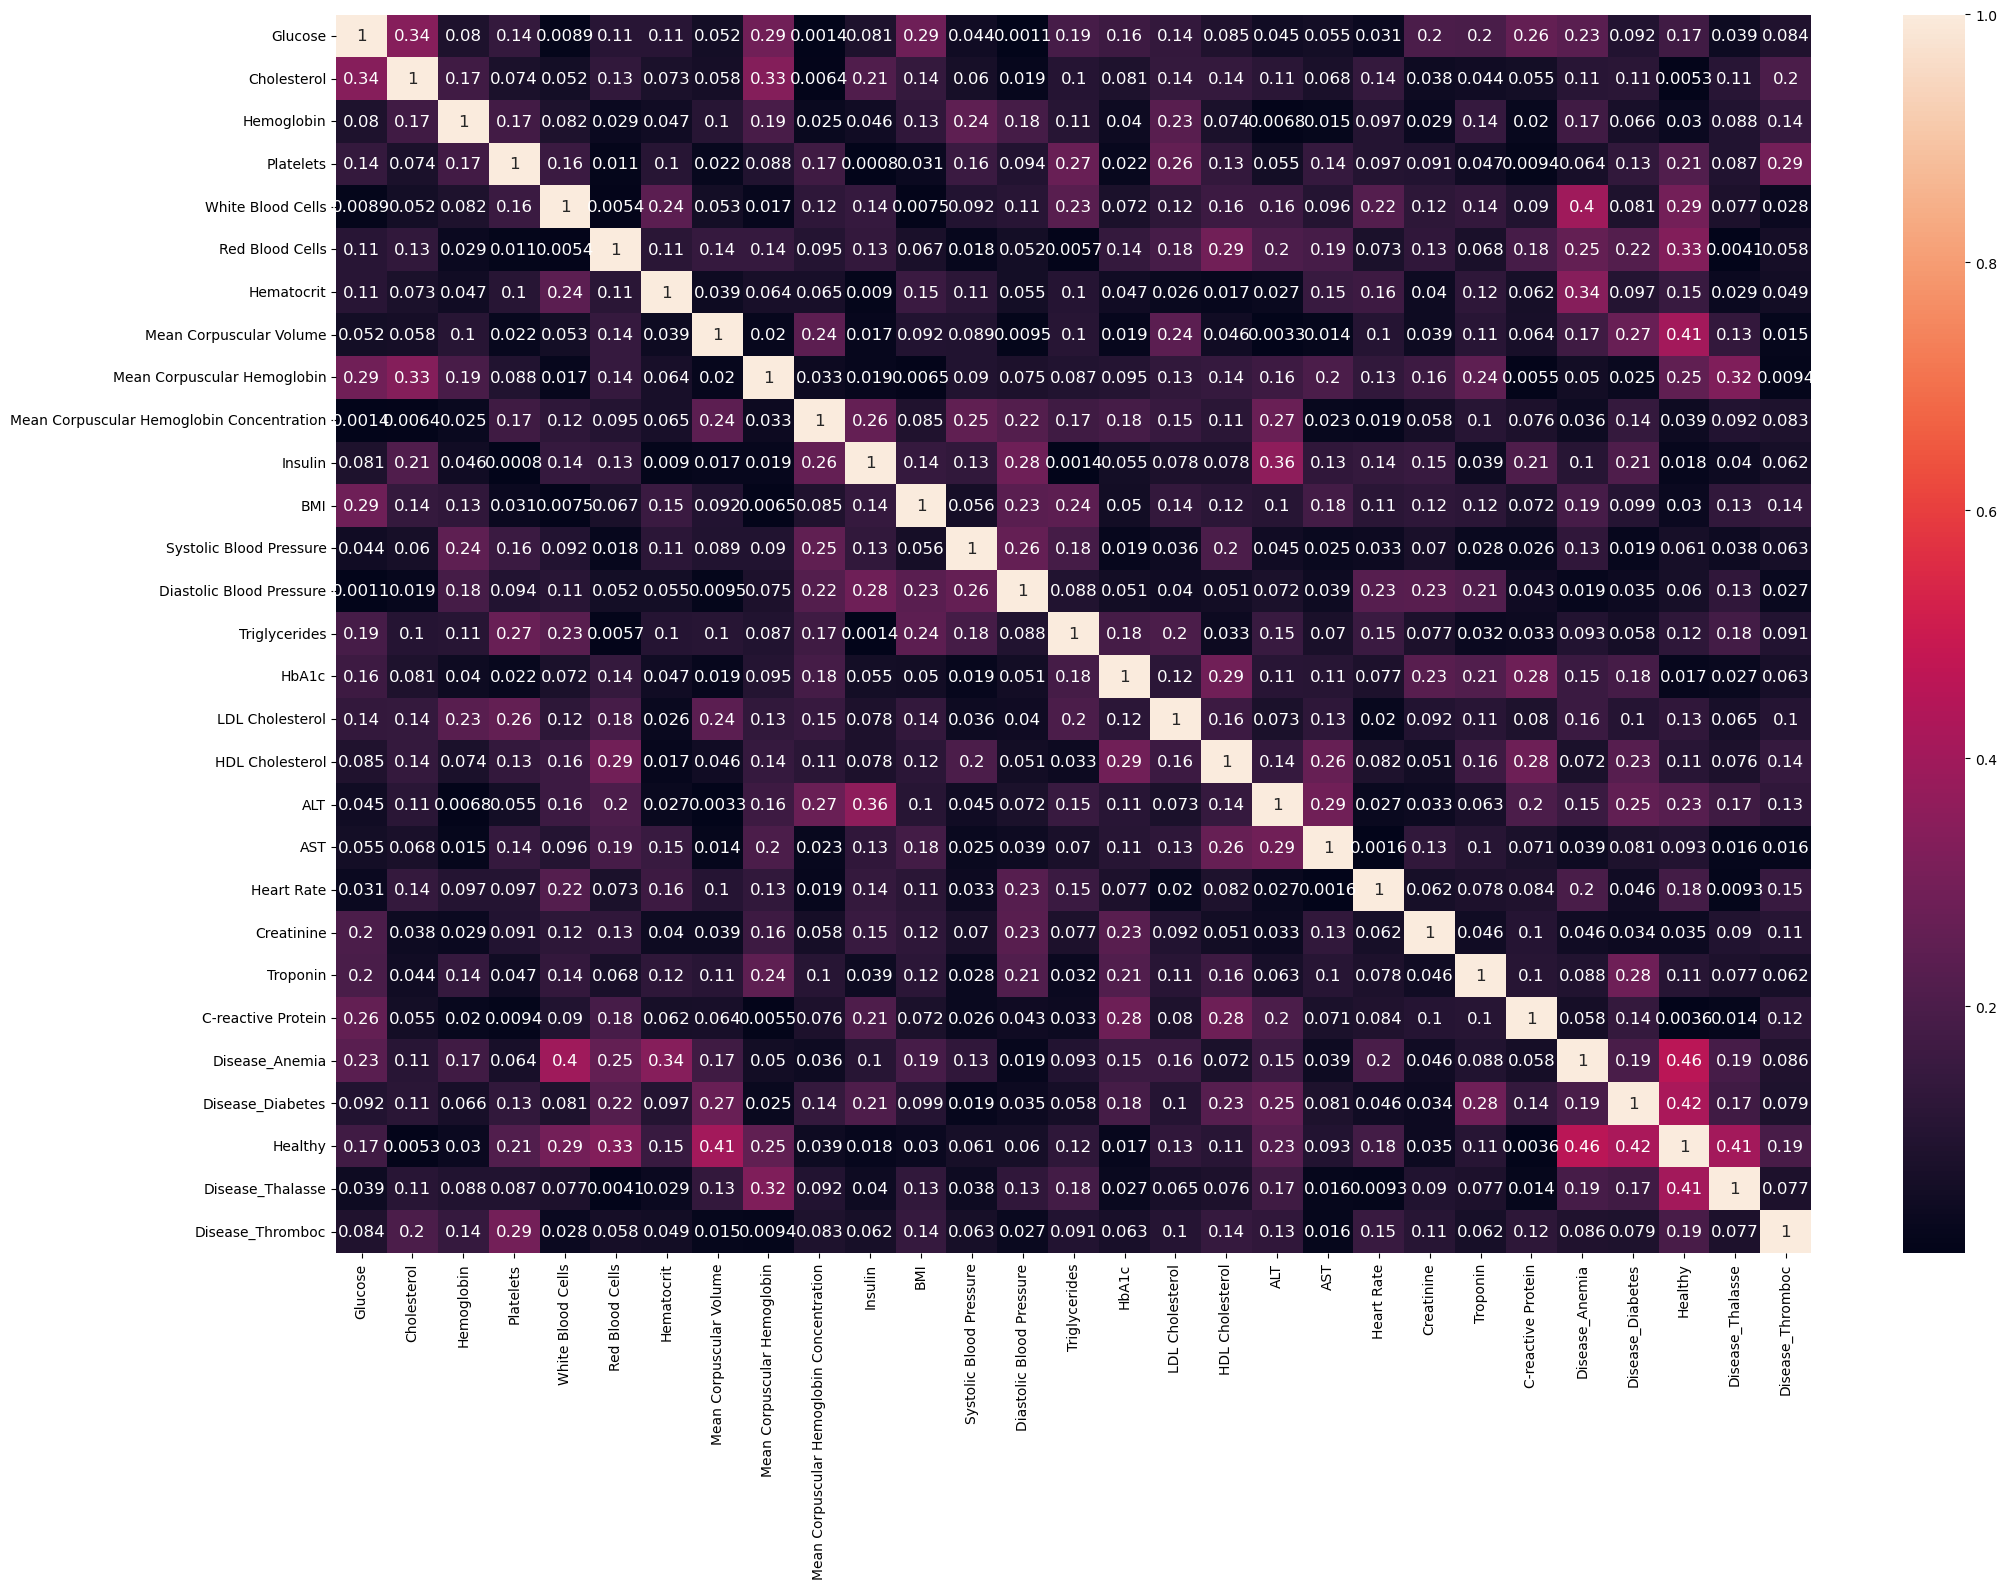

In [58]:
data_corr = data_balanced.corr().abs()  # This code will get the coefficient of one variable vs all other variable (Relationship)

plt.figure(figsize=(22, 16))
sns.heatmap(data_corr,annot=True,  annot_kws={'size':12})
plt.tight_layout()
plt.show()

In [59]:
# correlation with label
correlation = data_balanced.corr()
print(correlation['Healthy'].sort_values(ascending=False))

Healthy                                      1.000000
Red Blood Cells                              0.329408
White Blood Cells                            0.294899
Platelets                                    0.214644
Glucose                                      0.169537
Hematocrit                                   0.150715
LDL Cholesterol                              0.129508
Triglycerides                                0.122146
HDL Cholesterol                              0.107975
Diastolic Blood Pressure                     0.060010
Creatinine                                   0.034902
BMI                                          0.029692
Cholesterol                                  0.005343
C-reactive Protein                           0.003578
HbA1c                                       -0.017337
Insulin                                     -0.018495
Hemoglobin                                  -0.030464
Mean Corpuscular Hemoglobin Concentration   -0.039113
Systolic Blood Pressure     

In [60]:
# features to remove
features_to_remove = [
    'Cholesterol',
    'C-reactive Protein',
    'HbA1c',
    'Insulin',
    'Hemoglobin',
    'Mean Corpuscular Hemoglobin Concentration',
    'Creatinine',
    'BMI'
]

# Removing the features from the DataFrame
data_balanced = data_balanced.drop(columns=features_to_remove)

data_balanced.head()


Glucose  Platelets  White Blood Cells  Red Blood Cells  Hematocrit  \
1  0.121786   0.905372           0.507711         0.403033    0.164216   
2  0.452539   0.400640           0.294538         0.382021    0.625267   
3  0.136609   0.191487           0.081168         0.166214    0.073293   
4  0.176737   0.785286           0.443880         0.439851    0.894991   
5  0.898222   0.353082           0.373952         0.297138    0.900010   

   Mean Corpuscular Volume  Mean Corpuscular Hemoglobin  \
1                 0.307553                     0.207938   
2                 0.295122                     0.868369   
3                 0.668719                     0.125447   
4                 0.442159                     0.257288   
5                 0.985488                     0.679007   

   Systolic Blood Pressure  Diastolic Blood Pressure  Triglycerides  ...  \
1                 0.580903                  0.556037       0.477742  ...   
2                 0.045782                  0.663642       0.088940  ...   
3                 0.139289                  0.160496       0.406528  ...   
4                 0.118461                  0.005579       0.414407  ...   
5                 0.664835                  0.537559       0.766484  ...   

   HDL Cholesterol       ALT       AST  Heart Rate  Troponin  Disease_Anemia  \
1         0.106961  0.942549  0.344261    0.666368  0.816982               0   
2         0.421763  0.007186  0.506918    0.431704  0.799074               0   
3         0.826721  0.265415  0.594148    0.225756  0.637061               1   
4         0.221574  0.015280  0.567115    0.841412  0.794008               0   
5         0.222687  0.772461  0.119994    0.894273  0.379016               0   

   Disease_Diabetes  Healthy  Disease_Thalasse  Disease_Thromboc  
1                 1        0                 0                 0  
2                 0        0                 1                 0  
3                 0        0                 0                 0  
4                 0        0                 1                 0  
5                 1        0                 0                 0  

[5 rows x 21 columns]

### Data Cleaning Summary

Our dataset has been thoroughly examined and cleaned, and we are now ready to proceed to the next steps. Here are the key actions we have taken:

1. **Checked for Skewness**: We examined the skewness of all numerical features to ensure they are within acceptable ranges for modeling.
2. **Visualized Distributions**: We plotted the distributions of all features to visually inspect their shapes and distributions.
3. **Handled Class Imbalance**: We used the SMOTE (Synthetic Minority Over-sampling Technique) method to balance the classes in our target variable.
4. **Correlation Analysis**: We calculated the correlation between the target variable ("Healthy") and all features.
5. **Feature Selection**: Based on the correlation analysis, we removed features with very weak correlations to the target variable. The features removed are:
    - Cholesterol
    - C-reactive Protein
    - HbA1c
    - Insulin
    - Hemoglobin
    - Mean Corpuscular Hemoglobin Concentration
    - Creatinine
    - BMI

Now that our dataset is clean and preprocessed, we are ready to move on to the next steps, which include feature engineering, model selection, and training.

In [61]:
# Separating features (X) and target variable (y) from the balanced dataset.
X = data_balanced.drop(columns = ['Healthy'])
y = data_balanced['Healthy']

In [62]:
data_balanced.shape

(3590, 21)

In [63]:
data_balanced.columns

Index(['Glucose', 'Platelets', 'White Blood Cells', 'Red Blood Cells',
       'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST', 'Heart Rate',
       'Troponin', 'Disease_Anemia', 'Disease_Diabetes', 'Healthy',
       'Disease_Thalasse', 'Disease_Thromboc'],
      dtype='object')

In [64]:
data_test=pd.read_csv('test_data.csv')
data_test.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184890   
2                     0.500342                                   0.531829   
3                     0.785448                                   0.491495   
4                     0.621048                                   0.191756   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.653230         0.186104         0.430398  0.016678  0.885352   
1  ...  0.833540         0.153001         0.458533  0.401845  0.635969   
2  ...  0.678901         0.220479         0.817151  0.690981  0.101633   
3  ...  0.381500         0.459396         0.420154  0.798537  0.399236   
4  ...  0.993381         0.272338         0.663579  0.265227  0.918847   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.652733    0.788235  0.054788            0.031313  Thalasse  
1    0.574425    0.047025  0.607985            0.594123  Diabetes  
2    0.855740    0.551124  0.413294            0.070909  Heart Di  
3    0.324600    0.499504  0.436662            0.242766  Diabetes  
4    0.804910    0.571119  0.188368            0.750848  Heart Di  

[5 rows x 25 columns]

In [65]:
data_test.describe()

Glucose  Cholesterol  Hemoglobin   Platelets  White Blood Cells  \
count  486.000000   486.000000  486.000000  486.000000         486.000000   
mean     0.490044     0.506797    0.485502    0.528136           0.509783   
std      0.284196     0.282871    0.298818    0.292610           0.290887   
min      0.001827     0.003088    0.000719    0.000006          -0.000206   
25%      0.236664     0.268021    0.201994    0.276155           0.264944   
50%      0.496471     0.502397    0.477706    0.538642           0.511102   
75%      0.727144     0.754638    0.750028    0.789486           0.767896   
max      0.991742     0.999606    0.997876    0.999507           0.999646   

       Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
count       486.000000  486.000000               486.000000   
mean          0.504347    0.501042                 0.516185   
std           0.302865    0.294501                 0.279954   
min           0.000552    0.004556                 0.000309   
25%           0.218573    0.246255                 0.287755   
50%           0.518103    0.496275                 0.533319   
75%           0.768466    0.761107                 0.746765   
max           0.997267    1.000857                 0.996362   

       Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
count                   486.000000                                 486.000000   
mean                      0.510145                                   0.501105   
std                       0.285213                                   0.290614   
min                      -0.000614                                   0.000719   
25%                       0.259967                                   0.255839   
50%                       0.498332                                   0.493929   
75%                       0.761956                                   0.734817   
max                       0.999234                                   0.999666   

       ...  Triglycerides       HbA1c  LDL Cholesterol  HDL Cholesterol  \
count  ...     486.000000  486.000000       486.000000       486.000000   
mean   ...       0.498538    0.489365         0.501706         0.487933   
std    ...       0.288848    0.290849         0.286729         0.292726   
min    ...       0.001885   -0.000991         0.001036        -0.000546   
25%    ...       0.238772    0.239302         0.262516         0.229095   
50%    ...       0.503164    0.481549         0.511373         0.481533   
75%    ...       0.749527    0.725472         0.756136         0.741867   
max    ...       0.999826    0.999265         0.999567         1.000744   

              ALT         AST  Heart Rate  Creatinine    Troponin  \
count  486.000000  486.000000  486.000000  486.000000  486.000000   
mean     0.500615    0.499675    0.493794    0.515541    0.510077   
std      0.285374    0.301451    0.292400    0.287223    0.294011   
min     -0.000312    0.002047    0.002145    0.008831    0.005714   
25%      0.251076    0.239369    0.228581    0.262924    0.267101   
50%      0.515321    0.497846    0.507581    0.526299    0.508479   
75%      0.739248    0.775458    0.751124    0.777839    0.781128   
max      1.000326    1.000402    0.999857    0.999348    1.000125   

       C-reactive Protein  
count          486.000000  
mean             0.517365  
std              0.291645  
min             -0.000991  
25%              0.263192  
50%              0.546542  
75%              0.776940  
max              0.999488  

[8 rows x 24 columns]

In [66]:
data_test['Disease'].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

In [67]:
disease_test=pd.get_dummies(data_test[['Disease']], dtype=int)
disease_test.head()

Disease_Anemia  Disease_Diabetes  Disease_Healthy  Disease_Heart Di  \
0               0                 0                0                 0   
1               0                 1                0                 0   
2               0                 0                0                 1   
3               0                 1                0                 0   
4               0                 0                0                 1   

   Disease_Thalasse  Disease_Thromboc  
0                 1                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [68]:
data_test=pd.concat([data_test,disease_test],axis=1)
data_test.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184890   
2                     0.500342                                   0.531829   
3                     0.785448                                   0.491495   
4                     0.621048                                   0.191756   

   ...  Creatinine  Troponin  C-reactive Protein   Disease  Disease_Anemia  \
0  ...    0.788235  0.054788            0.031313  Thalasse               0   
1  ...    0.047025  0.607985            0.594123  Diabetes               0   
2  ...    0.551124  0.413294            0.070909  Heart Di               0   
3  ...    0.499504  0.436662            0.242766  Diabetes               0   
4  ...    0.571119  0.188368            0.750848  Heart Di               0   

   Disease_Diabetes  Disease_Healthy  Disease_Heart Di  Disease_Thalasse  \
0                 0                0                 0                 1   
1                 1                0                 0                 0   
2                 0                0                 1                 0   
3                 1                0                 0                 0   
4                 0                0                 1                 0   

   Disease_Thromboc  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 31 columns]

In [69]:
data_test=data_test.drop(columns=['Disease'])

In [70]:
data_test.rename(columns={'Disease_Healthy':'Healthy'},inplace=True)
data_test.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184890   
2                     0.500342                                   0.531829   
3                     0.785448                                   0.491495   
4                     0.621048                                   0.191756   

   ...  Heart Rate  Creatinine  Troponin  C-reactive Protein  Disease_Anemia  \
0  ...    0.652733    0.788235  0.054788            0.031313               0   
1  ...    0.574425    0.047025  0.607985            0.594123               0   
2  ...    0.855740    0.551124  0.413294            0.070909               0   
3  ...    0.324600    0.499504  0.436662            0.242766               0   
4  ...    0.804910    0.571119  0.188368            0.750848               0   

   Disease_Diabetes  Healthy  Disease_Heart Di  Disease_Thalasse  \
0                 0        0                 0                 1   
1                 1        0                 0                 0   
2                 0        0                 1                 0   
3                 1        0                 0                 0   
4                 0        0                 1                 0   

   Disease_Thromboc  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 30 columns]

In [71]:
data_test.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease_Anemia', 'Disease_Diabetes', 'Healthy', 'Disease_Heart Di',
       'Disease_Thalasse', 'Disease_Thromboc'],
      dtype='object')

In [72]:
data_test['Healthy'].value_counts()

Healthy
0    481
1      5
Name: count, dtype: int64

In [73]:
from sklearn.utils import resample

# Separate majority and minority classes
data_test_majority = data_test[data_test['Healthy'] == 0]
data_test_minority = data_test[data_test['Healthy'] == 1]

# Upsample minority class
data_test_minority_upsampled = resample(data_test_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=481,    # to match majority class
                                 random_state=42)   # reproducible results

# Combine majority class with upsampled minority class
data_test_balanced = pd.concat([data_test_majority, data_test_minority_upsampled])

# Display new class counts
print(data_test_balanced['Healthy'].value_counts())

Healthy
0    481
1    481
Name: count, dtype: int64


In [74]:
# features to remove
features_to_remove_from_test_dataset = [
    'Cholesterol',
    'C-reactive Protein',
    'HbA1c',
    'Insulin',
    'Hemoglobin',
    'Mean Corpuscular Hemoglobin Concentration',
    'Creatinine',
    'BMI',
    'Disease_Heart Di'
]

# Removing the features from the DataFrame
data_test_balanced = data_test_balanced.drop(columns=features_to_remove_from_test_dataset)

data_test_balanced.head()

Glucose  Platelets  White Blood Cells  Red Blood Cells  Hematocrit  \
0  0.001827   0.997927           0.562604         0.866499    0.578042   
1  0.436679   0.180909           0.675736         0.563889    0.798382   
2  0.545697   0.475748           0.558596         0.661007    0.934056   
3  0.172994   0.782022           0.069435         0.085219    0.032907   
4  0.758534   0.772683           0.875720         0.860265    0.486189   

   Mean Corpuscular Volume  Mean Corpuscular Hemoglobin  \
0                 0.914615                     0.026864   
1                 0.670361                     0.376092   
2                 0.381782                     0.500342   
3                 0.460619                     0.785448   
4                 0.486686                     0.621048   

   Systolic Blood Pressure  Diastolic Blood Pressure  Triglycerides  ...  \
0                 0.616684                  0.168031       0.970168  ...   
1                 0.498084                  0.216581       0.517805  ...   
2                 0.966303                  0.967512       0.521000  ...   
3                 0.023462                  0.744379       0.944932  ...   
4                 0.293196                  0.968128       0.082744  ...   

   HDL Cholesterol       ALT       AST  Heart Rate  Troponin  Disease_Anemia  \
0         0.430398  0.016678  0.885352    0.652733  0.054788               0   
1         0.458533  0.401845  0.635969    0.574425  0.607985               0   
2         0.817151  0.690981  0.101633    0.855740  0.413294               0   
3         0.420154  0.798537  0.399236    0.324600  0.436662               0   
4         0.663579  0.265227  0.918847    0.804910  0.188368               0   

   Disease_Diabetes  Healthy  Disease_Thalasse  Disease_Thromboc  
0                 0        0                 1                 0  
1                 1        0                 0                 0  
2                 0        0                 0                 0  
3                 1        0                 0                 0  
4                 0        0                 0                 0  

[5 rows x 21 columns]

### Next

In [75]:
# Separating features (X) and target variable (y) from the balanced dataset.
X = data_balanced.drop(columns = ['Healthy'])
y = data_balanced['Healthy']

In [76]:
#model
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [77]:
# Separating features (X) and target variable (y) from the balanced dataset.
X_test = data_test_balanced.drop(columns = ['Healthy'])
y_test = data_test_balanced['Healthy']

In [78]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test,y_pred)

0.9594594594594594

In [81]:
feature_name=list(X.columns)
class_name = list(y.unique())
feature_name

['Glucose',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Troponin',
 'Disease_Anemia',
 'Disease_Diabetes',
 'Disease_Thalasse',
 'Disease_Thromboc']

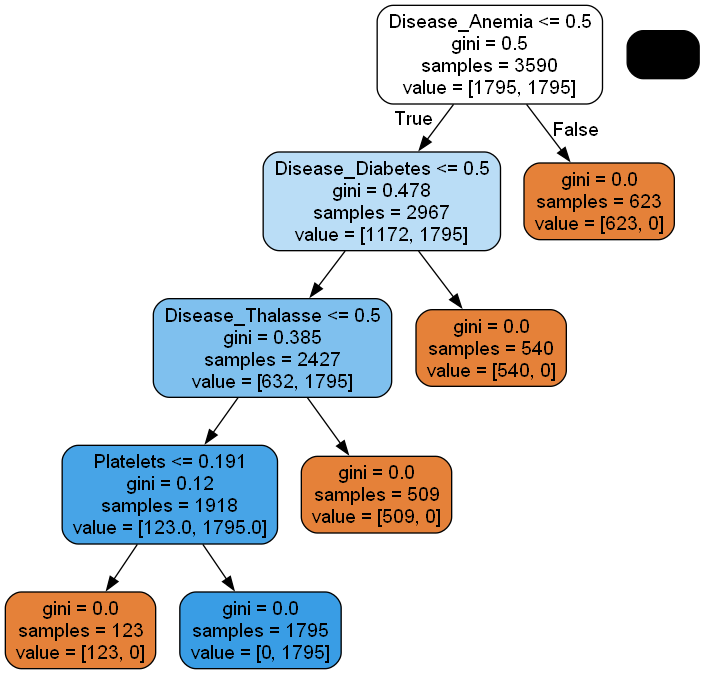

In [82]:

import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus

# create a dot_file which stores the tree structure
dot_data = export_graphviz(model,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [83]:
model.score(X_test,y_test)   # This is Training score

0.9594594594594594

In [84]:
accuracy_score(y_test,y_pred)

0.9594594594594594

In [85]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[442,  39],
       [  0, 481]], dtype=int64)

###### Let's check Accuracy manually

 __Accuracy__= $ \frac{ (TP+TN)}{(TP+TN+FP+FN)} $

In [87]:
(442+5)/(442+5+39)

0.9197530864197531

In [88]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       481
           1       0.93      1.00      0.96       481

    accuracy                           0.96       962
   macro avg       0.96      0.96      0.96       962
weighted avg       0.96      0.96      0.96       962



In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

In [90]:
# ROC Curve
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [91]:
# thresholds[0] means no instances predicted (It should be read from 0 - max)
print ('Threshold =', thresholds)
print ('True Positive rate = ',tpr)
print ('False Positive rate = ',fpr)

Threshold = [inf  1.  0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0.         0.08108108 1.        ]


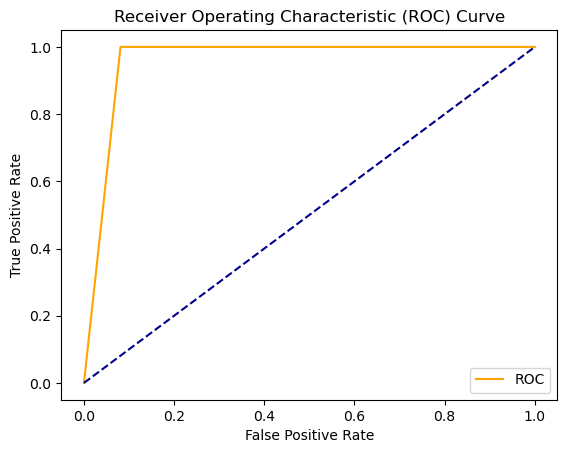

In [92]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [93]:
# How much area it is covering (AUC)
auc_score = roc_auc_score(y_test,y_pred)
print (auc_score)

0.9594594594594594


In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'model' is your trained model and you have predictions for the test set
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.925
Recall: 1.0
F1 Score: 0.961038961038961
